In [1]:
import librosa
import librosa.display
import numpy as np
import random
import audiomentations as A
import soundfile as sf
import os


In [2]:
# Define the augmentation pipeline
augment1 = A.Compose([A.AddGaussianNoise(p=0.2)])
augment2 = A.Compose([A.TimeStretch(p=0.2)])
augment3 = A.Compose([A.PitchShift(p=0.2)])
augment4 = A.Compose([A.Shift(p=0.2)])
augment5 = A.Compose([A.TimeMask(p=0.2)])

# Load the original audio file
original_audio, sr = sf.read("donateacry/belly_pain/69BDA5D6-0276-4462-9BF7-951799563728-1436936185-1.1-m-26-bp.wav")

# Apply augmentation to create augmented audio
augmented_audio1 = augment1(samples=original_audio, sample_rate=sr)
augmented_audio2 = augment2(samples=original_audio, sample_rate=sr)
augmented_audio3 = augment3(samples=original_audio, sample_rate=sr)
augmented_audio4 = augment4(samples=original_audio, sample_rate=sr)
augmented_audio5 = augment5(samples=original_audio, sample_rate=sr)

# Save the augmented audio
sf.write("augmented_audio1.wav", augmented_audio1, sr)
sf.write("augmented_audio2.wav", augmented_audio2, sr)
sf.write("augmented_audio3.wav", augmented_audio3, sr)
sf.write("augmented_audio4.wav", augmented_audio4, sr)
sf.write("augmented_audio5.wav", augmented_audio5, sr)


c:\Users\chada\AppData\Local\Programs\Python\Python39\lib\site-packages\audiomentations\core\transforms_interface.py:61: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(
c:\Users\chada\AppData\Local\Programs\Python\Python39\lib\site-packages\audiomentations\core\transforms_interface.py:61: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


In [3]:
# Define constants for data preprocessing
num_mfcc_coefficients = 13  # Number of MFCC coefficients (adjust as needed)
desired_shape = (457, num_mfcc_coefficients, 1)  # Replace with your model's input shape
main_folder = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']  # Replace with your class names
folder_name = 'donateacry'  # Replace with your dataset folder path
num_classes = len(main_folder)  # Number of classes

# Initialize lists to store preprocessed data
preprocessed_data = []
preprocessed_labels = []

In [4]:
# Function to preprocess an audio file
def preprocess_audio(audio_folder):
    for index, cls in enumerate(audio_folder):
        class_folder = os.path.join(folder_name, cls)
        for file in os.listdir(class_folder)[:15]:
            audio_file = os.path.join(class_folder, file)
            original_audio, sr = sf.read(audio_file)

            # Apply augmentation to create augmented audio
            augmented_audio1 = augment1(samples=original_audio, sample_rate=sr)
            augmented_audio2 = augment2(samples=original_audio, sample_rate=sr)
            augmented_audio3 = augment3(samples=original_audio, sample_rate=sr)
            augmented_audio4 = augment4(samples=original_audio, sample_rate=sr)
            augmented_audio5 = augment5(samples=original_audio, sample_rate=sr)
            

            # Perform feature extraction (e.g., MFCCs)
            mfccs1 = librosa.feature.mfcc(y=original_audio, sr=sr, n_mfcc=num_mfcc_coefficients)
            mfccs2 = librosa.feature.mfcc(y=augmented_audio1, sr=sr, n_mfcc=num_mfcc_coefficients)
            mfccs3 = librosa.feature.mfcc(y=augmented_audio2, sr=sr, n_mfcc=num_mfcc_coefficients)
            mfccs4 = librosa.feature.mfcc(y=augmented_audio3, sr=sr, n_mfcc=num_mfcc_coefficients)
            mfccs5 = librosa.feature.mfcc(y=augmented_audio4, sr=sr, n_mfcc=num_mfcc_coefficients)
            mfccs6 = librosa.feature.mfcc(y=augmented_audio5, sr=sr, n_mfcc=num_mfcc_coefficients)

            # Normalize the MFCCs (optional but recommended)
            mfccs1 = (mfccs1 - np.mean(mfccs1)) / np.std(mfccs1)
            mfccs2 = (mfccs2 - np.mean(mfccs2)) / np.std(mfccs2)
            mfccs3 = (mfccs3 - np.mean(mfccs3)) / np.std(mfccs3)
            mfccs4 = (mfccs4 - np.mean(mfccs4)) / np.std(mfccs4)
            mfccs5 = (mfccs5 - np.mean(mfccs5)) / np.std(mfccs5)
            mfccs6 = (mfccs6 - np.mean(mfccs6)) / np.std(mfccs6)

            # Append the preprocessed data and label
            preprocessed_data.append(mfccs1.T[:, :, np.newaxis])  # Transpose the data
            preprocessed_labels.append(index)
            preprocessed_data.append(mfccs2.T[:, :, np.newaxis])  # Transpose the data
            preprocessed_labels.append(index)
            preprocessed_data.append(mfccs3.T[:, :, np.newaxis])  # Transpose the data
            preprocessed_labels.append(index)
            preprocessed_data.append(mfccs4.T[:, :, np.newaxis])  # Transpose the data
            preprocessed_labels.append(index)
            preprocessed_data.append(mfccs5.T[:, :, np.newaxis])  # Transpose the data
            preprocessed_labels.append(index)
            preprocessed_data.append(mfccs6.T[:, :, np.newaxis])  # Transpose the data
            preprocessed_labels.append(index)

    return preprocessed_data,preprocessed_labels

In [5]:
preprocess_audio(main_folder) 

c:\Users\chada\AppData\Local\Programs\Python\Python39\lib\site-packages\audiomentations\core\transforms_interface.py:61: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


([array([[[-5.36326234],
          [ 0.30723974],
          [ 0.30723974],
          ...,
          [ 0.30723974],
          [ 0.30723974],
          [ 0.30723974]],
  
         [[-5.36326234],
          [ 0.30723974],
          [ 0.30723974],
          ...,
          [ 0.30723974],
          [ 0.30723974],
          [ 0.30723974]],
  
         [[-5.36326234],
          [ 0.30723974],
          [ 0.30723974],
          ...,
          [ 0.30723974],
          [ 0.30723974],
          [ 0.30723974]],
  
         ...,
  
         [[-2.99851542],
          [ 1.12162174],
          [-0.251872  ],
          ...,
          [ 0.1495462 ],
          [ 0.25344712],
          [ 0.31369424]],
  
         [[-2.53345331],
          [ 1.0757713 ],
          [-0.29234574],
          ...,
          [ 0.11718103],
          [ 0.2363816 ],
          [ 0.29279719]],
  
         [[-2.5232376 ],
          [ 0.98405484],
          [-0.23010044],
          ...,
          [ 0.20921434],
          [ 0.23231251]

In [6]:
print(len(preprocessed_data))
print(len(preprocessed_labels))

408
408


In [7]:
import pandas as pd
flat_data = [arr.flatten() for arr in preprocessed_data]
df = pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429
0,-5.363262,0.307240,0.307240,0.307240,0.307240,0.30724,0.307240,0.307240,0.307240,0.307240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-5.363263,0.307240,0.307240,0.307240,0.307240,0.30724,0.307240,0.307240,0.307240,0.307240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-5.363263,0.307240,0.307240,0.307240,0.307240,0.30724,0.307240,0.307240,0.307240,0.307240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-5.363263,0.307240,0.307240,0.307240,0.307240,0.30724,0.307240,0.307240,0.307240,0.307240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-5.363263,0.307240,0.307240,0.307240,0.307240,0.30724,0.307240,0.307240,0.307240,0.307240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-5.283183,2.029405,-0.284803,-0.172805,0.370627,0.26438,-0.364482,0.250474,0.386433,0.680341,...,0.087933,-0.311204,0.775786,0.053991,0.126577,-0.053202,0.532155,1.27085,0.859028,0.14792
404,-5.283183,2.029405,-0.284803,-0.172805,0.370627,0.26438,-0.364482,0.250474,0.386433,0.680341,...,0.087933,-0.311204,0.775786,0.053991,0.126577,-0.053202,0.532155,1.27085,0.859028,0.14792
405,-5.283183,2.029405,-0.284803,-0.172805,0.370627,0.26438,-0.364482,0.250474,0.386433,0.680341,...,0.087933,-0.311204,0.775786,0.053991,0.126577,-0.053202,0.532155,1.27085,0.859028,0.14792
406,-5.283183,2.029405,-0.284803,-0.172805,0.370627,0.26438,-0.364482,0.250474,0.386433,0.680341,...,0.087933,-0.311204,0.775786,0.053991,0.126577,-0.053202,0.532155,1.27085,0.859028,0.14792


<Axes: >

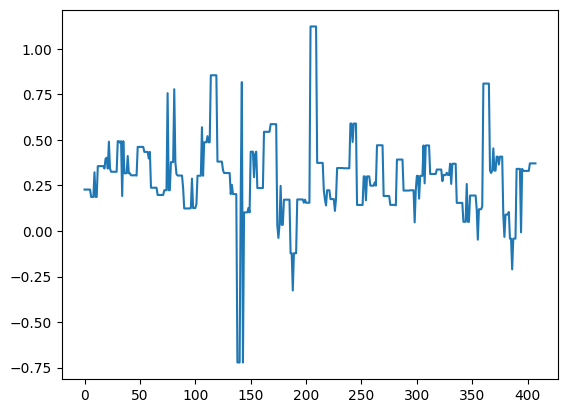

In [9]:
df[308].plot()